In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import collections
from itertools import chain
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('final_mfrc_data.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61226 entries, 0 to 61225
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        61226 non-null  object
 1   subreddit   61226 non-null  object
 2   bucket      61226 non-null  object
 3   annotator   61226 non-null  object
 4   annotation  61226 non-null  object
 5   confidence  61184 non-null  object
dtypes: object(6)
memory usage: 2.8+ MB


### Data Preprocessing


In [ ]:
list_words = []
for row in df["annotation"]:
    words = row.split(',')
    word_counts = collections.Counter(words)
    list_words.append(words)
    flat_list = list(chain.from_iterable(list_words))
unique_words = set(flat_list)

In [95]:
# Get the unique words
annotator_data = [{'annotator': row[0], 'annotation': row[1], 'bucket': row[2], 'confidence': row[3], 'subreddit': row[4]} for row in df[['annotator', 'annotation', 'bucket', 'confidence', 'subreddit']].values]
# Get the counts of each word
labels = [{'Non-Moral': row['annotation'].count('Non-Moral'), 'Thin Morality': row['annotation'].count('Thin Morality'), 'Care': row['annotation'].count('Care'), 'Equality': row['annotation'].count('Equality'), 'Authority': row['annotation'].count('Authority'), 'Proportionality': row['annotation'].count('Proportionality'), 'Loyalty': row['annotation'].count('Loyalty'), 'Purity': row['annotation'].count('Purity')} for row in annotator_data]
# Convert to a dataframe
labels = pd.DataFrame(labels)
# Sum the counts
labels = labels.sum(axis=0)


In [5]:
annotators = ['annotator00', 'annotator01', 'annotator02', 'annotator03', 'annotator04', 'annotator05']

# for each annotator, sum up the labels in annotator data
annotator_labels = []
for annotator in annotators:
    # get the annotations for this annotator
    annotations = [row['annotation'] for row in annotator_data if row['annotator'] == annotator]
    # split the annotations into a list of labels
    annotations = [annotation.split(',') for annotation in annotations]
    # flatten the list of lists
    annotations = [item for sublist in annotations for item in sublist]
    # count the labels
    counts = collections.Counter(annotations)
    # add the counts to the dict
    counts['annotator'] = annotator
    # add the dict to the array
    annotator_labels.append(counts)

# convert the array of dicts to a dataframe
annotator_labels = pd.DataFrame(annotator_labels)
# set the index to the annotator
annotator_labels = annotator_labels.set_index('annotator')


In [22]:
# For each annotator, sum up the buckets in annotator data
annotator_buckets = []
for annotator in annotators:
    # get the buckets for this annotator
    buckets = [row['bucket'] for row in annotator_data if row['annotator'] == annotator]
    # split the buckets into a list of labels
    buckets = [bucket.split(',') for bucket in buckets]
    # flatten the list of lists
    buckets = [item for sublist in buckets for item in sublist]
    # count the labels
    counts = collections.Counter(buckets)
    # add the counts to the dict
    counts['annotator'] = annotator
    # add the dict to the array
    annotator_buckets.append(counts)


# convert the array of dicts to a dataframe
annotator_buckets = pd.DataFrame(annotator_buckets)
# make NaN values to 0
annotator_buckets = annotator_buckets.fillna(0)
# set the index to the annotator
annotator_buckets = annotator_buckets.set_index('annotator')

In [89]:
# For each annotator, sum up the confidence in annotator data
annotator_confidence = []
for annotator in annotators:
    # get the confidence for this annotator
    confidence = [row['confidence'] for row in annotator_data if row['annotator'] == annotator]
    # count the labels
    counts = collections.Counter(confidence)
    # add the counts to the dict
    counts['annotator'] = annotator
    # add the dict to the array
    annotator_confidence.append(counts)

# convert the array of dicts to a dataframe
annotator_confidence = pd.DataFrame(annotator_confidence)
# set the index to the annotator
annotator_confidence = annotator_confidence.set_index('annotator')
# drop the 'nan' column
annotator_confidence = annotator_confidence.drop(annotator_confidence.columns[3], axis=1)

In [98]:
# For each annotator, sum up the subreddit in annotator data
annotator_subreddit = []
for annotator in annotators:
    # get the subreddit for this annotator
    subreddit = [row['subreddit'] for row in annotator_data if row['annotator'] == annotator]
    # count the labels
    counts = collections.Counter(subreddit)
    # add the counts to the dict
    counts['annotator'] = annotator
    # add the dict to the array
    annotator_subreddit.append(counts)

# convert the array of dicts to a dataframe
annotator_subreddit = pd.DataFrame(annotator_subreddit)
# set the index to the annotator
annotator_subreddit = annotator_subreddit.set_index('annotator')
# fill NaN values with 0
annotator_subreddit = annotator_subreddit.fillna(0)

### Box plot
Bar graph filled with all the bars like the storage on your phone

In [7]:
# Pie chart for label distribution
ames = list(labels.index)
values = labels.values

fig = px.pie(labels, values=values, names=names, title='Moral Foundations Label Distribution', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.show()



In [94]:
# Pie chart of the buckets for the sum of all annotators
names = list(annotator_buckets.columns)
values = annotator_buckets.sum(axis=0).values

fig = px.pie(annotator_buckets, values=values, names=names, title='Moral Foundations Bucket Distribution', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.show()

In [92]:
# Pie chart of the confidence for the sum of all annotators
names = list(annotator_confidence.columns)
values = annotator_confidence.sum(axis=0).values

fig = px.pie(annotator_confidence, values=values, names=names, title='Confidence Distribution', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.show()




In [99]:
# Pie chart of the subreddit for the sum of all annotators
names = list(annotator_subreddit.columns)
values = annotator_subreddit.sum(axis=0).values

fig = px.pie(annotator_subreddit, values=values, names=names, title='Subreddit Distribution', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.show()

### Histogram
Yaga

In [8]:
# Histogram of the labels
fig = px.histogram(labels, x=labels.index, y=[labels.values], color=labels.values, color_discrete_sequence=px.colors.sequential.Reds_r)
# show the plot
fig.show()

In [ ]:
# Vanya?
fig = px.histogram(df, x='annotation', color='annotator', title = 'Annotation Distribution by Annotator', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Heatmap 
Yaga

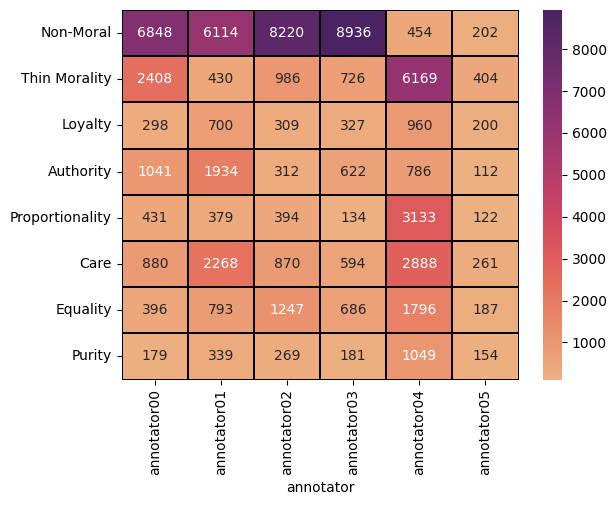

In [11]:
# Heatmap of annotator labels
sns.heatmap(annotator_labels.T, annot=True, fmt='d',cmap='flare', linewidths=0.1, linecolor='black');

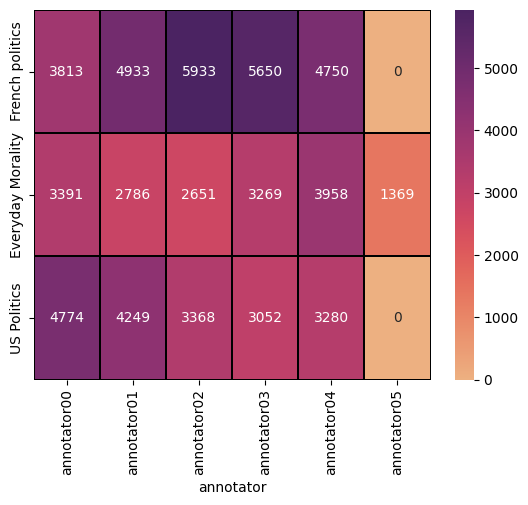

In [101]:
# Heatmap of the annotator buckets
sns.heatmap(annotator_buckets.T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black');

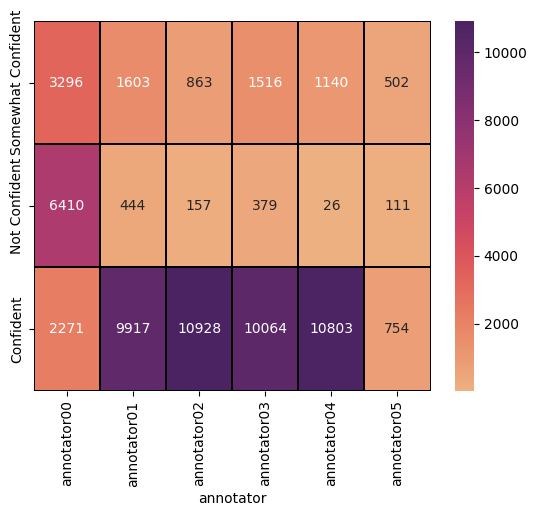

In [93]:
# Heatmap of the annotator confidence
sns.heatmap(annotator_confidence.T, annot=True, fmt='d',cmap='flare', linewidths=0.1, linecolor='black');

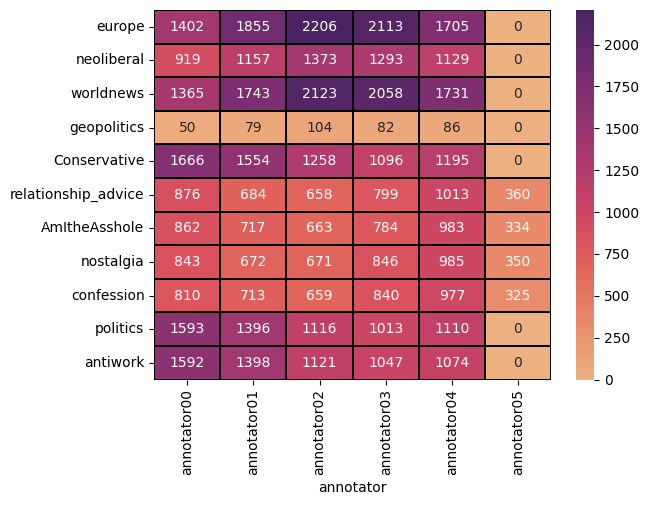

In [100]:
# Heatmap of the annotator subreddit
sns.heatmap(annotator_subreddit.T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black');

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = df.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')